In [1]:
%matplotlib inline

In [2]:
from pylab import *
import pylab
import matplotlib as mpl
import numpy
import lnm
from graph import Graph
import ipywidgets as widgets
from IPython.display import display, HTML
mpl.rcParams['savefig.dpi'] = 180
OPTIONS = {'FSM': 'results_fsm.txt',
           'Snake': 'results_snake.txt',
           'Tetris': 'results_tetris.txt',
           'Tetris New': 'results_tetris_03-11-15.txt',
           'Sieve': 'results_sieve.txt',
           'Suffix Tree': 'results_suffixtree.txt',
           'Synth':'results_synth.txt'}
s = widgets.Dropdown(options=OPTIONS)

In [29]:
display(s)

In [30]:
HTML("<h1>Filename: '" + s.value + "'</h1>")

# Select Benchmark:

In [31]:
graph = lnm.read_data(s.value)
variations, data = graph.ungraph()
hidden_untyped = data[0,2]
pycket_untyped = data[0,1]
racket_untyped = data[0,0]
hidden = data[:,2]
pycket = data[:,1]
racket = data[:,0]

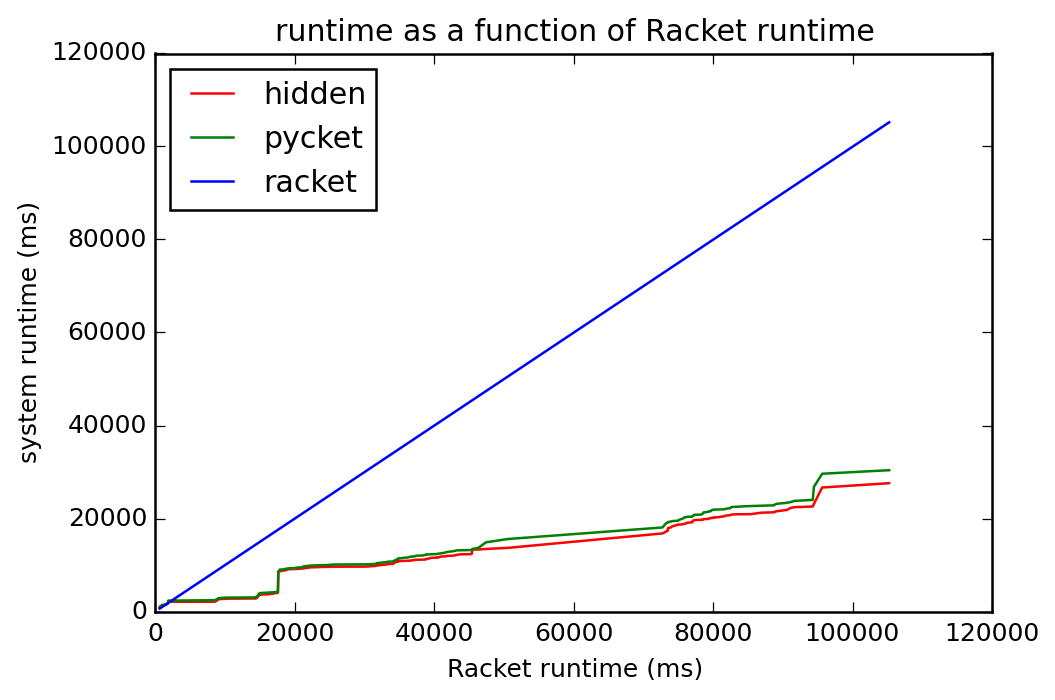

In [32]:
# Runtime of Pycket as a function of Racket
ordered_data = np.copy(data)
ordered_data.sort(axis=0)
ohidden = ordered_data[:,2]
opycket = ordered_data[:,1]
oracket = ordered_data[:,0]
pylab.plot(oracket, ohidden, 'r', label='hidden')
pylab.plot(oracket, opycket, 'g', label='pycket')
pylab.plot(oracket, oracket, 'b', label='racket')
pylab.title('runtime as a function of Racket runtime')
pylab.xlabel('Racket runtime (ms)')
pylab.ylabel('system runtime (ms)')
pylab.legend(loc='best')

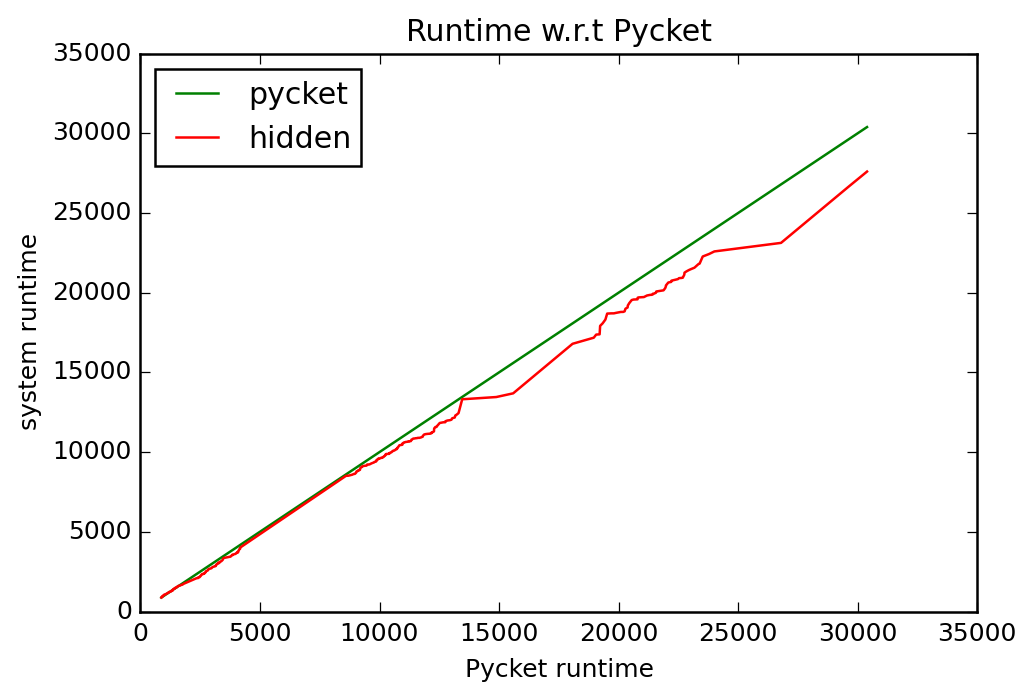

In [33]:
pylab.plot(opycket, opycket, 'g', label='pycket')
pylab.plot(opycket, ohidden, 'r', label='hidden')
pylab.title('Runtime w.r.t Pycket')
pylab.xlabel('Pycket runtime')
pylab.ylabel('system runtime')
pylab.legend(loc='best')

In [34]:
from scipy.stats import cumfreq
from pandas      import DataFrame
from ipy_table   import *

hidden_slowdown = hidden / float(hidden_untyped)
pycket_slowdown = pycket / float(pycket_untyped)
racket_slowdown = racket / float(racket_untyped)

def compute_deliverable(data):
    th = sum(data < 3)
    oh = sum(numpy.logical_and(data >= 3, data < 10))
    return [max(data), numpy.mean(data), np.median(data), "%d (%0.2f%%)" % (th, th / float(len(data)) * 100), "%d (%0.2f%%)" % (oh, oh / float(len(data)) * 100)]

def make_deliverable_table(**kwargs):
    lst = [["", "Max overhead", "Mean overhead", "Median overhead", "300-deliverable", "300/1000-usable"]]
    for name, data in kwargs.iteritems():
        lst.append([name] + compute_deliverable(data))
    tbl = make_table(map(list, zip(*lst)))
    apply_theme('basic_both')
    return tbl

def slowdown_cdf(*args):
    for data, color, label in args:
        counts, bin_edges = numpy.histogram(data, bins=len(data))
        cdf = numpy.cumsum(counts)
        pylab.plot(bin_edges[:-1], cdf, color=color, label=label)
    pylab.axvline(3, color='y')
    pylab.axvline(10, color='k')
    pylab.axhline(len(data) * 0.6, color='c', ls='--')
    pylab.xlabel('slowdown factor')
    pylab.xlim((1,20))
    pylab.ylim((0,len(racket)))
    pylab.ylabel('number below')
    pylab.legend(loc='best')
    
def compute_lnm_deliverable(slowdown_graph, L):
    graph = lnm.compute_lnm_times(slowdown_graph, L)
    data = graph.ungraph()[1]
    rs = data[:,0]
    ps = data[:,1]
    hs = data[:,2]
    return rs, ps, hs, make_deliverable_table(racket=rs, pycket=ps,hidden=hs)
    

# Slowdown Summary Stats

In [35]:
DataFrame({'racket':racket_slowdown, 'pycket':pycket_slowdown, 'hidden':hidden_slowdown}).describe()

,hidden,pycket,racket
count,512.000000,512.000000,512.000000
mean,7.805552,8.434810,34.469980
std,6.575273,7.185979,34.468592
min,0.928194,0.941935,0.867403
25%,2.213041,2.565860,9.464088
50%,6.626188,6.882258,24.306630
75%,11.218849,11.912097,47.624309
max,29.139388,32.673118,145.303867


# Deliverability Stats

## L = 0

In [36]:
slowdown_graph = lnm.fromkeyvals(variations, racket_slowdown, pycket_slowdown, hidden_slowdown)
racket_slowdown0, pycket_slowdown0, hidden_slowdown0, tbl = compute_lnm_deliverable(slowdown_graph, 0)
tbl

,racket,hidden,pycket
Max overhead,145.3039,29.1394,32.6731
Mean overhead,34.4700,7.8056,8.4348
Median overhead,24.3066,6.6262,6.8823
300-deliverable,128 (25.00%),206 (40.23%),168 (32.81%)
300/1000-usable,0 (0.00%),98 (19.14%),109 (21.29%)


## L = 1

In [37]:
racket_slowdown1, pycket_slowdown1, hidden_slowdown1, tbl = compute_lnm_deliverable(slowdown_graph, 1)
tbl

,racket,hidden,pycket
Max overhead,30.3370,3.8141,4.2796
Mean overhead,7.1012,1.8105,1.9350
Median overhead,1.2099,1.3738,1.4484
300-deliverable,320 (62.50%),488 (95.31%),400 (78.12%)
300/1000-usable,0 (0.00%),24 (4.69%),112 (21.88%)


## L = 2

In [38]:
racket_slowdown2, pycket_slowdown2, hidden_slowdown2, tbl = compute_lnm_deliverable(slowdown_graph, 2)
tbl

,racket,hidden,pycket
Max overhead,2.4254,2.2154,1.8516
Mean overhead,1.0602,1.1711,1.1731
Median overhead,0.9282,1.1257,1.1140
300-deliverable,512 (100.00%),512 (100.00%),512 (100.00%)
300/1000-usable,0 (0.00%),0 (0.00%),0 (0.00%)


# Slowdown distribution

## L = 0

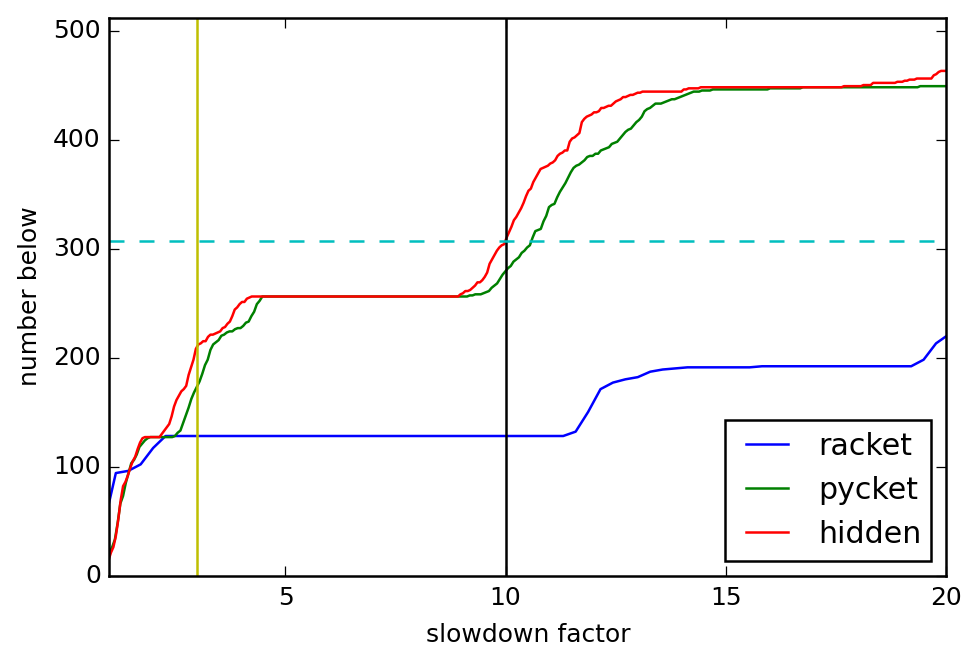

In [39]:
slowdown_cdf((racket_slowdown0, 'b', 'racket'),
             (pycket_slowdown0, 'g', 'pycket'),
             (hidden_slowdown0, 'r', 'hidden'))

## L = 1

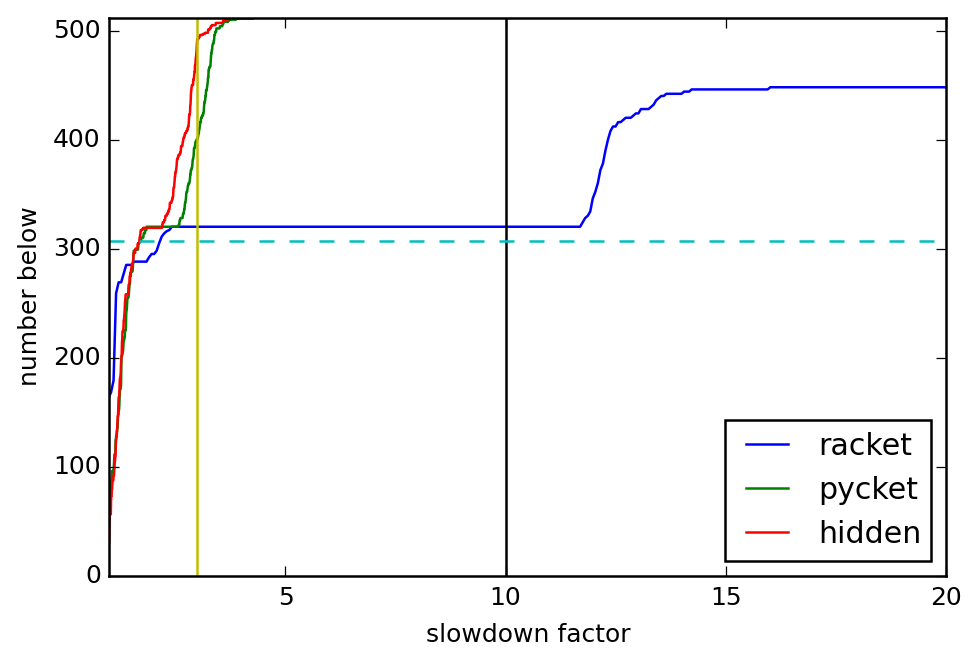

In [40]:
slowdown_cdf((racket_slowdown1, 'b', 'racket'),
             (pycket_slowdown1, 'g', 'pycket'),
             (hidden_slowdown1, 'r', 'hidden'))

## L = 2

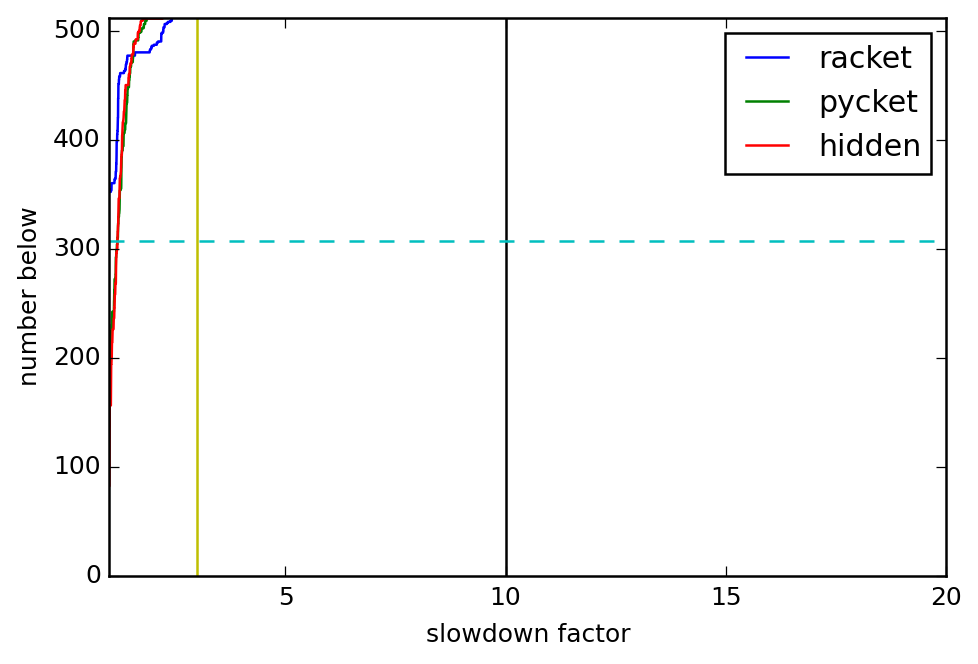

In [41]:
slowdown_cdf((racket_slowdown2, 'b', 'racket'),
             (pycket_slowdown2, 'g', 'pycket'),
             (hidden_slowdown2, 'r', 'hidden'))